# ERC-4626: all vaults on a particular chain

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [57]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [58]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 22,859 vaults in the database and 11,055,470 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [59]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [60]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 2,364,637 price rows across all vaults on Arbitrum.


chain                                     address  \
timestamp                                                                
2024-01-11 09:13:06  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 10:13:15  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 11:13:20  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 12:13:25  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   

                     block_number  share_price  total_assets  total_supply  \
timestamp                                                                    
2024-01-11 09:13:06     169318721         1.00          1.00          1.00   
2024-01-11 10:13:15     169333121         1.00          1.00          1.00   
2024-01-11 11:13:20     169347521         1.00          1.00          1.00   
2024-01-11 12:13:25     169361921         1.00          1.00          1.00   

                     performance_fee  management_fee errors  \
timestamp                                                     
2024-01-11 09:13:06              NaN             NaN          
2024-01-11 10:13:15              NaN             NaN          
2024-01-11 11:13:20              NaN             NaN          
2024-01-11 12:13:25              NaN             NaN          

                                                                   id  \
timestamp                                                               
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 10:13:15  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 11:13:20  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 12:13:25  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   

                                             name  event_count  \
timestamp                                                        
2024-01-11 09:13:06  Staked USDA (Arbitrum) #1420       126527   
2024-01-11 10:13:15  Staked USDA (Arbitrum) #1420       126527   
2024-01-11 11:13:20  Staked USDA (Arbitrum) #1420       126527   
2024-01-11 12:13:25  Staked USDA (Arbitrum) #1420       126527   

                               protocol  raw_share_price  pct_change_prev  \
timestamp                                                                   
2024-01-11 09:13:06  <unknown ERC-4626>             1.00              NaN   
2024-01-11 10:13:15  <unknown ERC-4626>             1.00             0.00   
2024-01-11 11:13:20  <unknown ERC-4626>             1.00             0.00   
2024-01-11 12:13:25  <unknown ERC-4626>             1.00             0.00   

                     pct_change_next  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2024-01-11 09:13:06             0.00        0.00                 1.00   
2024-01-11 10:13:15             0.00        0.00                 1.00   
2024-01-11 11:13:20             0.00        0.00                 1.00   
2024-01-11 12:13:25             0.00        0.00                 1.00   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2024-01-11 09:13:06                   0.02                True  
2024-01-11 10:13:15                   0.02                True  
2024-01-11 11:13:20                   0.02                True  
2024-01-11 12:13:25                   0.02                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [61]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(vault_df):,} price rows.")

We have selectd 268 vaults out of total of 5,515 vaults on chain Arbitrum, having 572,625 price rows.


## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [62]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.5,  # 50% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/107 [00:00<?, ?it/s]

Cleaning metrics for 107 vaults
Vault entries with too high NAV values filtered out: 0
Vault entries with too small ATH NAV values filtered out: 4
Vaults abnormally high returns: 7
Vault entries with too few deposit and redeem events (min 25) filtered out: 12
Calculated lifetime metrics for 81 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  cagr  \
12                           ostiumLP             0.14  0.11   
25  Peapods Interest Bearing USDC - 6             0.21  0.33   

    three_months_returns  three_months_cagr  three_months_sharpe  \
12                  0.04               0.16                 1.97   
25                  0.06               0.28               204.37   

    one_month_returns  one_month_cagr  three_months_volatility denomination  \
12               0.04            0.54                     0.00         USDC   
25               0.03            0.40                     0.00         USDC   

       chain      peak_nav   current_nav  years  mgmt_fee  perf_fee  \
12  Arbitrum 68,095,256.35 30,264,096.03   1.27       NaN       NaN   
25  Arbitrum  4,599,069.91    751,611.63   0.67       NaN       NaN   

    event_count protocol                                                id  \
12        15824   Ostium  42161-0x20d419a8e12c45f88fda7c5760bb6923cee27f98   
25        10273  Peapods  42161-0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f   

            start_date            end_date  
12 2025-09-10 01:09:22 2025-10-10 00:22:50  
25 2025-09-10 01:09:22 2025-10-10 00:22:50

## Top vault list

- List top vaults on the chain, formatted for readability



In [63]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)


print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df.head(50),
    add_index=True,
    add_address=True,
)

cols_to_move = ['Name', '1M return ann.', 'Address']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]


# Script output
max_address_dump = 20
print(f"Top {max_address_dump} vaults by 1 month annualised return are: {', '.join(formatted_df.head(max_address_dump)['Name'])}")
print(f"Top {max_address_dump} vaults by 1 month annualised return are: {', '.join(formatted_df.head(max_address_dump)['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 79 vaults.
Top 20 vaults by 1 month annualised return are: ostiumLP, Peapods Interest Bearing USDC - 6, HYPE++, gmUSDC, Peapods Interest Bearing USDC - 25, FARM_USDC, Silo Finance Borrowable USDC Deposit in ARB Silo, USDC-2 yVault, Curve Vault for crvUSD, Nashpoint DeFi & RWA Fund, Autopilot USDC Arbitrum, Silo Finance Borrowable USDC Deposit, SiloId: 146, LazyVault_LowerRisk_USDC, USDn2, Yield Chasing Silo USDC, Yield Chasing USDC, Staked USDai, Yield Chasing crvUSD, Dolomite: USDC, Clearstar USDC Reactor
Top 20 vaults by 1 month annualised return are: 0x20d419a8e12c45f88fda7c5760bb6923cee27f98, 0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f, 0x75288264fdfea8ce68e6d852696ab1ce2f3e5004, 0x959f3807f0aa7921e18c78b00b2819ba91e52fef, 0xd15a07a4150b0c057912fe883f7ad22b97161591, 0x2d5fde3d24ed3e7c548a59039eee5af8200f9291, 0xb739ae19620f7ecb4fb84727f205453aa5bc1ad2, 0x9fa306b1f4a6a83fec98d8ebbabedff78c407f6b, 0xc8248953429d707c6a2815653eca89846ffaa

Name 1M return ann.  \
#                                                                      
1                                            ostiumLP         54.49%   
2                   Peapods Interest Bearing USDC - 6         40.05%   
3                                              HYPE++         37.10%   
4                                              gmUSDC         26.69%   
5                  Peapods Interest Bearing USDC - 25         24.88%   
6                                           FARM_USDC         23.55%   
7    Silo Finance Borrowable USDC Deposit in ARB Silo         20.39%   
8                                       USDC-2 yVault         17.50%   
9                              Curve Vault for crvUSD         13.25%   
10                          Nashpoint DeFi & RWA Fund         12.35%   
11                            Autopilot USDC Arbitrum         12.35%   
12  Silo Finance Borrowable USDC Deposit, SiloId: 146         11.93%   
13                           LazyVault_LowerRisk_USDC         11.43%   
14                                              USDn2         11.32%   
15                            Yield Chasing Silo USDC         11.11%   
16                                 Yield Chasing USDC         11.05%   
17                                       Staked USDai         10.62%   
18                               Yield Chasing crvUSD         10.33%   
19                                     Dolomite: USDC          9.89%   
20                             Clearstar USDC Reactor          9.30%   
21                                   MEV Capital USDC          8.87%   
22                                   Yearn Degen USDC          8.72%   
23                                     Hyperithm USDC          8.43%   
24  Silo Finance Borrowable USDC Deposit, SiloId: 145          7.81%   
25                                 Gauntlet USDC Core          7.32%   
26                                         Saving USX          7.25%   
27                                 Gains Network USDC          6.66%   
28                              Steakhouse Prime USDC          6.22%   
29                                        Staked USDX          6.20%   
30                         Steakhouse High Yield USDC          5.97%   
31                                      Yearn OG USDC          5.64%   
32                      BasisOS USDC-LINK Hyperliquid          5.47%   
33                             Curve Vault for crvUSD          5.15%   
34                                Gauntlet USDC Prime          5.01%   
35                                    Euler Earn USDC          4.97%   
36                          Wrapped Aave Arbitrum GHO          4.96%   
37                                   Spark USDC Vault          4.92%   
38                                    Fluid Gho Token          4.85%   
39                         Static Aave Arbitrum USDCn          4.80%   
40                        Wrapped Aave Arbitrum USDCn          4.80%   
41               Crypto.com Defi Wallet Compound USDC          4.41%   
42                                        dForce USDC          4.24%   
43                                     Fluid USD Coin          4.07%   
44                   Crypto.com Defi Wallet AAVE USDC          3.94%   
45                         fija Strategy USDC AaveOpt          3.52%   
46                    Concrete USDC MultiSig Strategy          2.99%   
47                                        Staked EURA          2.98%   
48                                  Gains Network DAI          2.98%   
49                             Curve Vault for crvUSD          2.61%   
50                                         autoSUSDai          1.75%   

                                       Address Lifetime return  \
#                                                                
1   0x20d419a8e12c45f88fda7c5760bb6923cee27f98          14.15%   
2   0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f          21.15%   
3   0x75288264fdfea8ce68e6d852696ab1ce2f

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

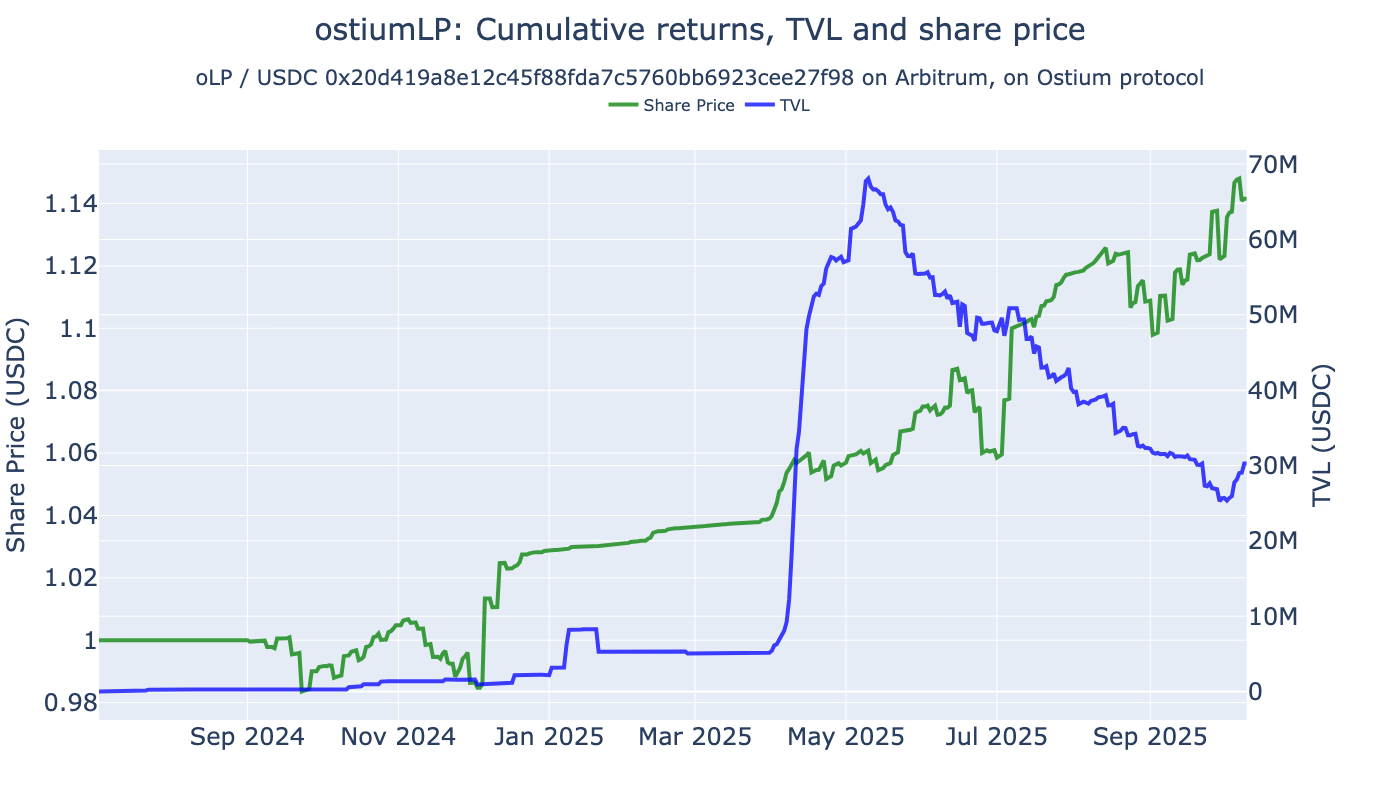

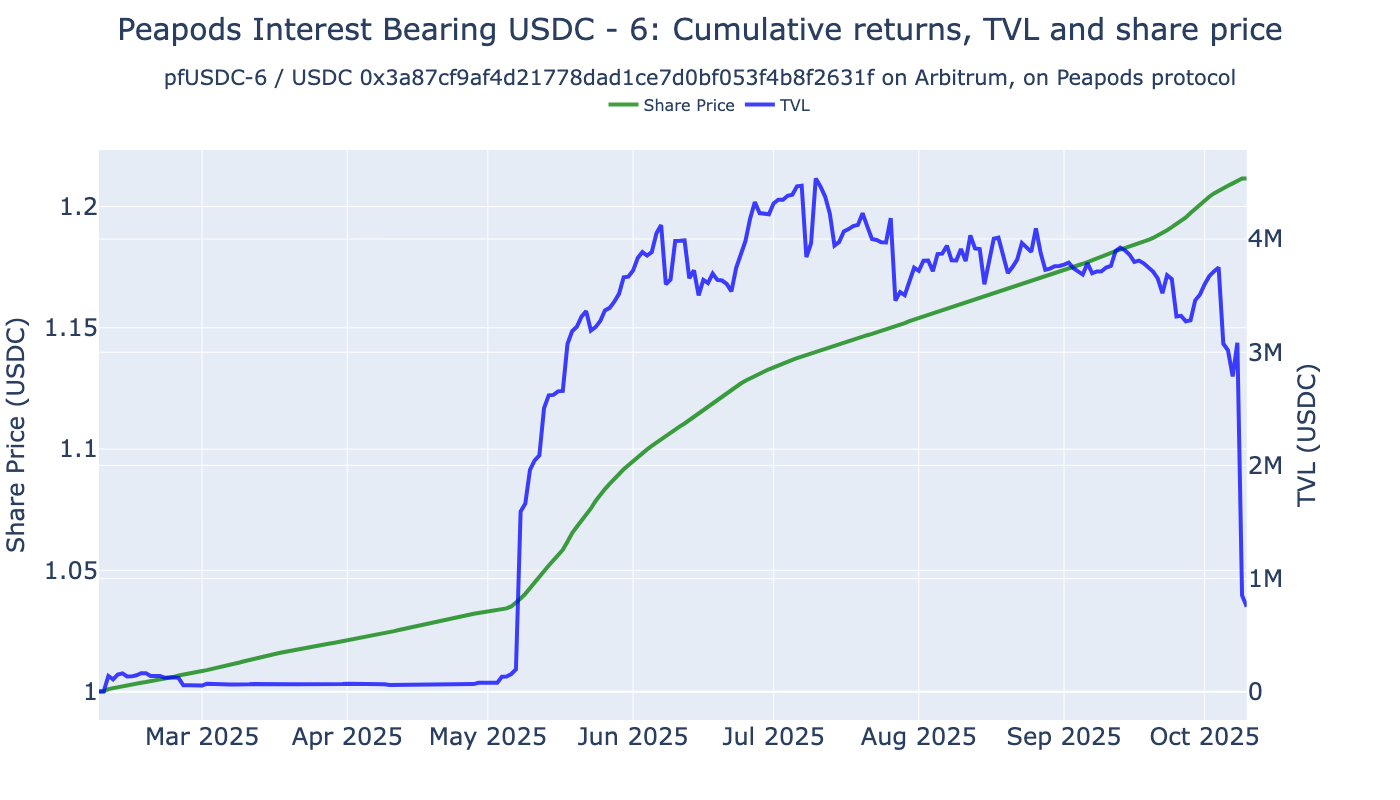

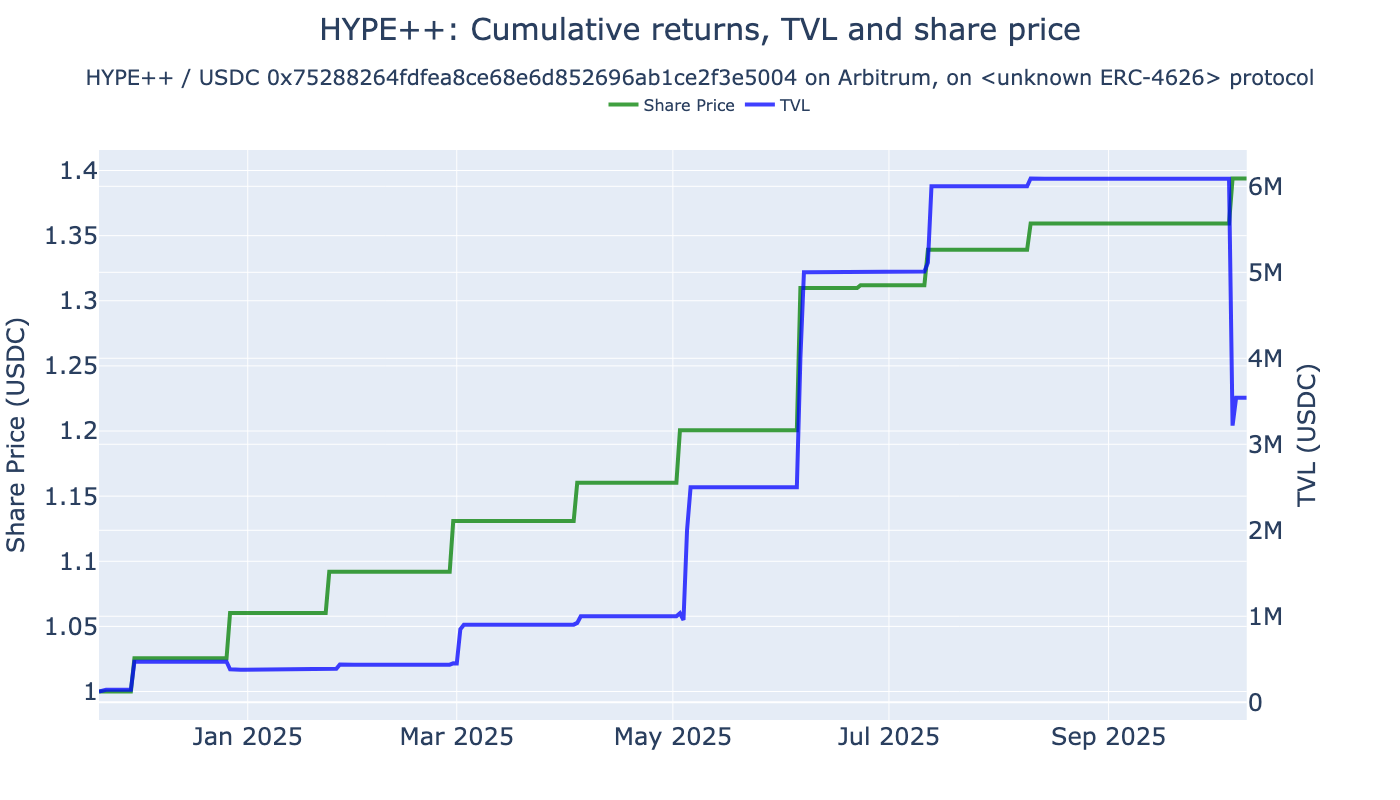

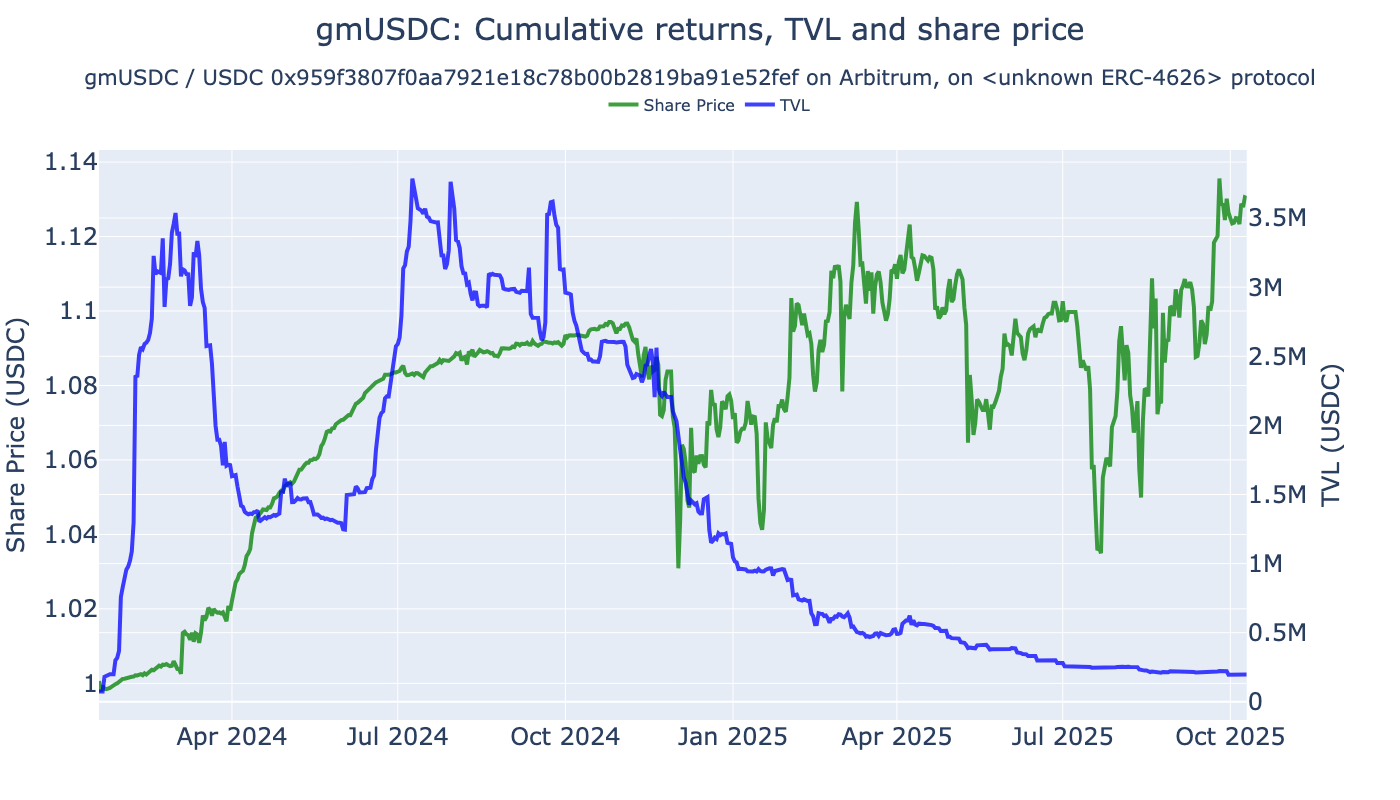

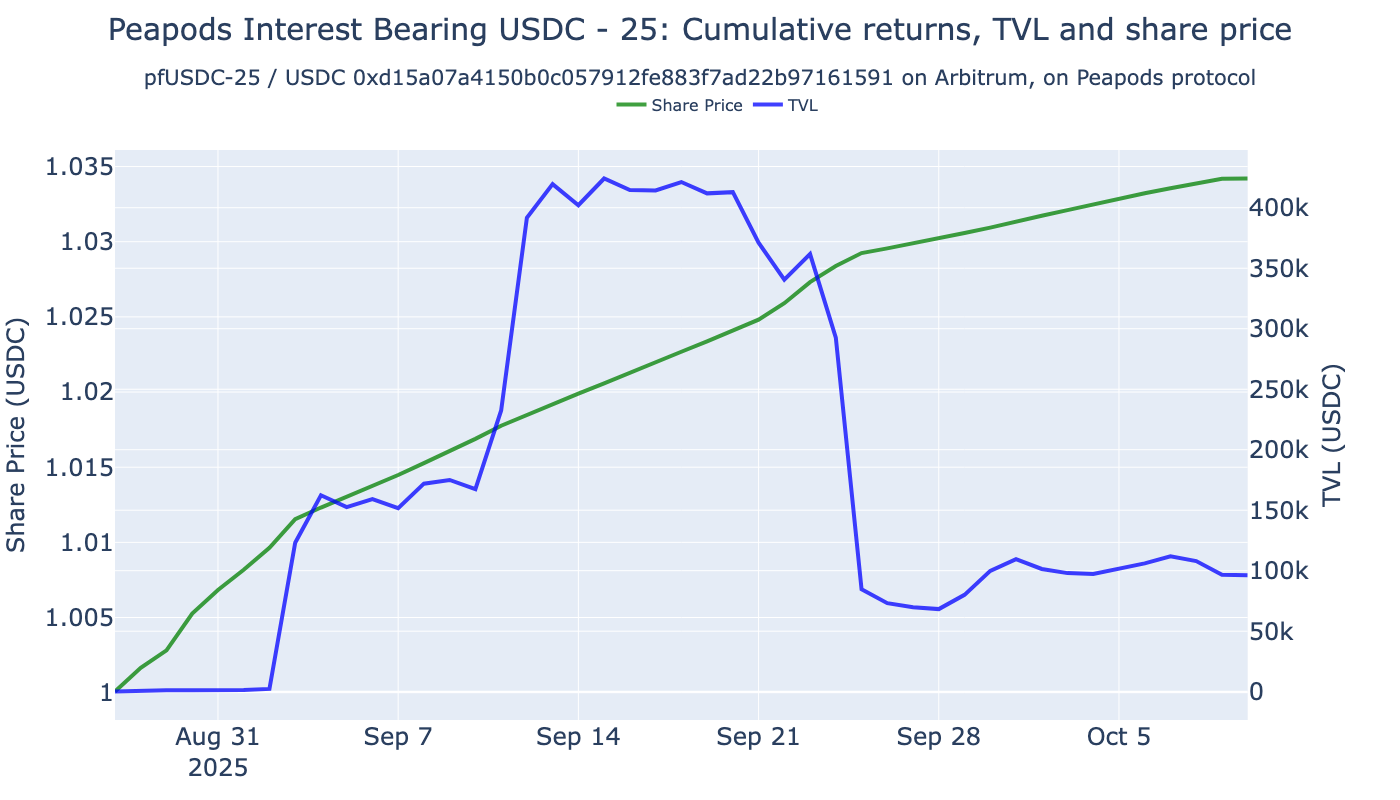

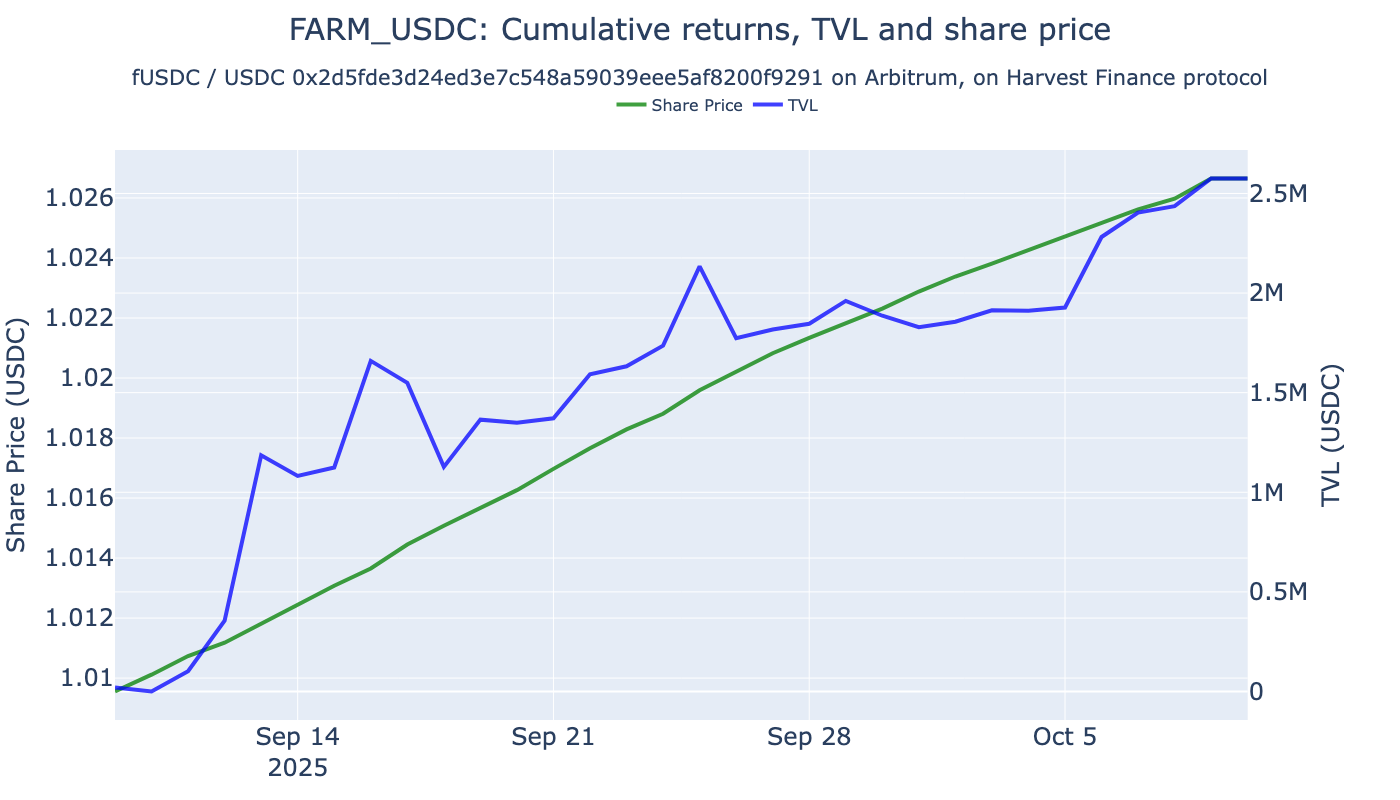

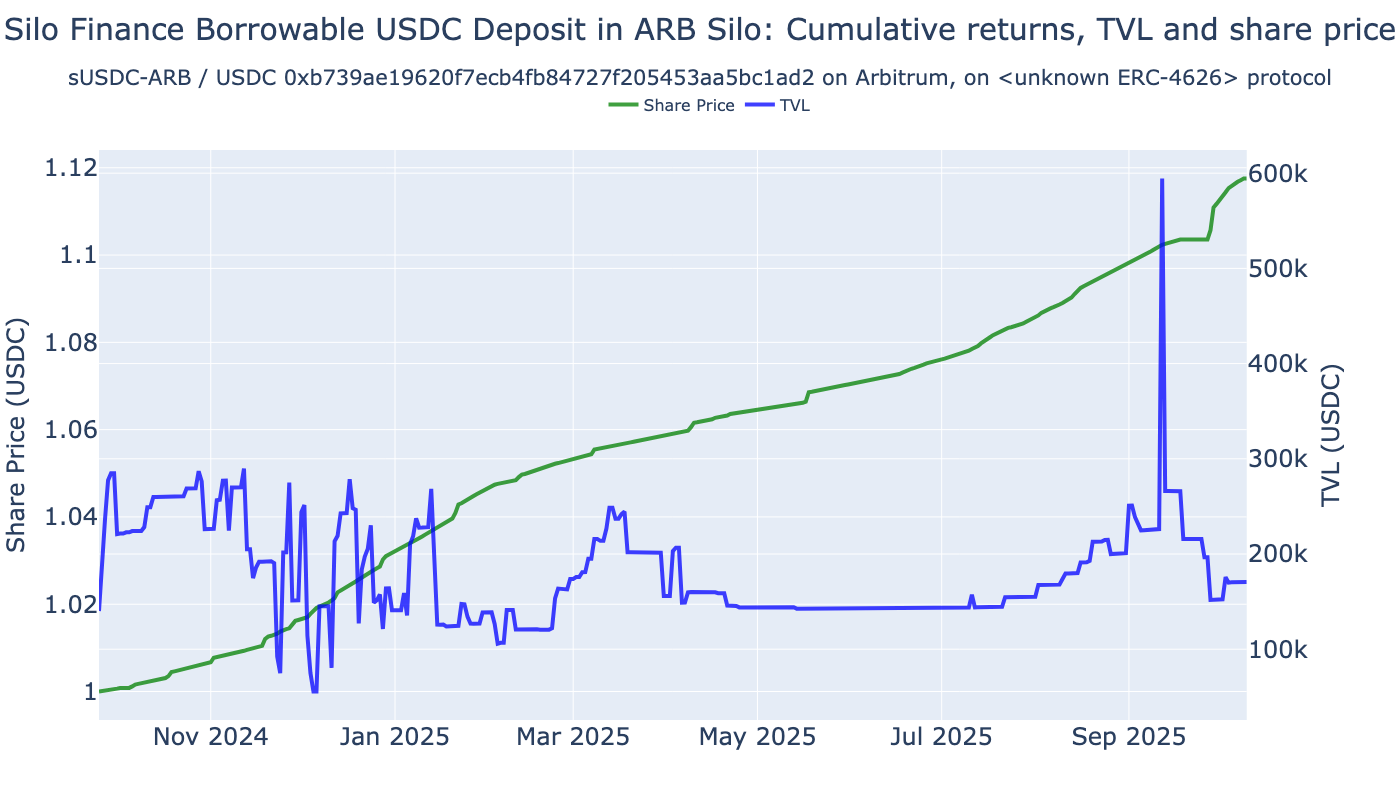

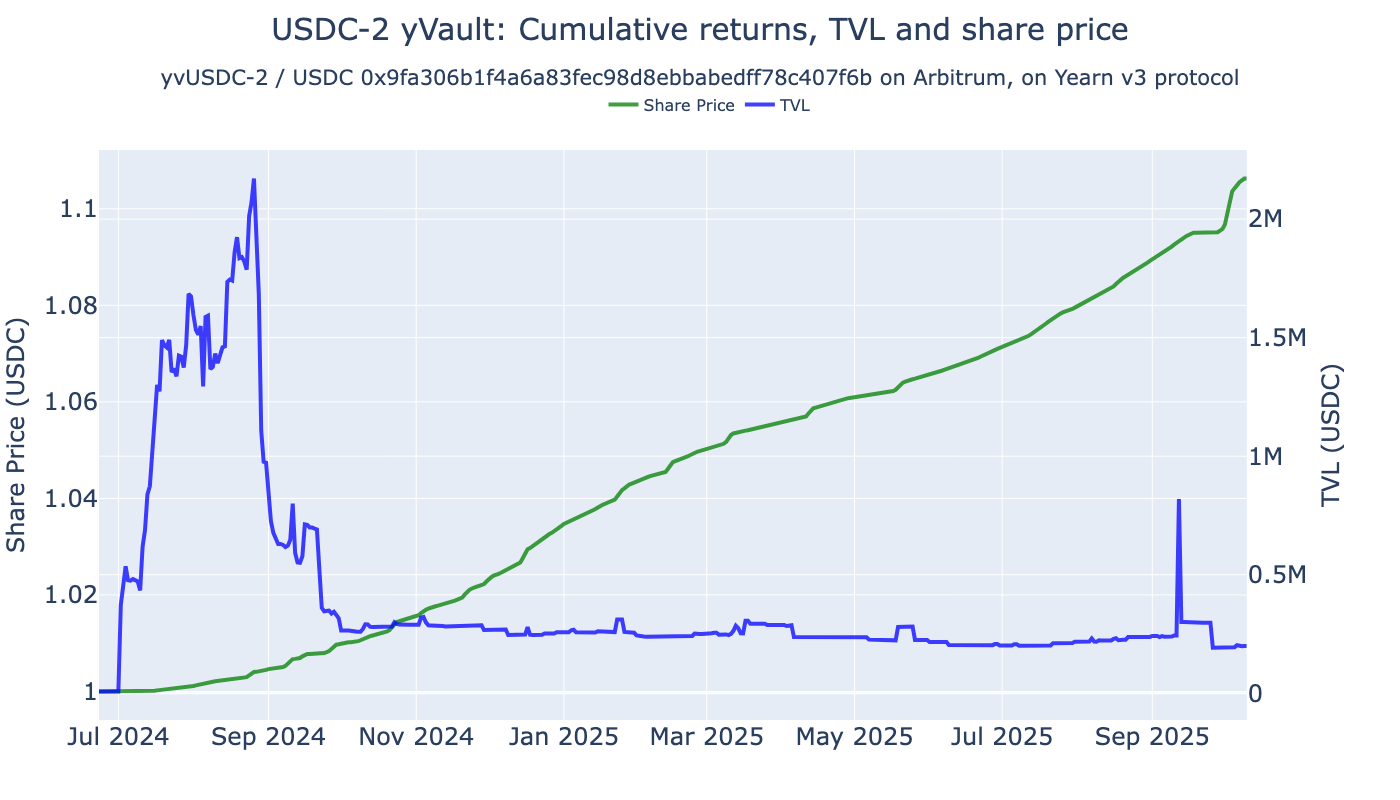

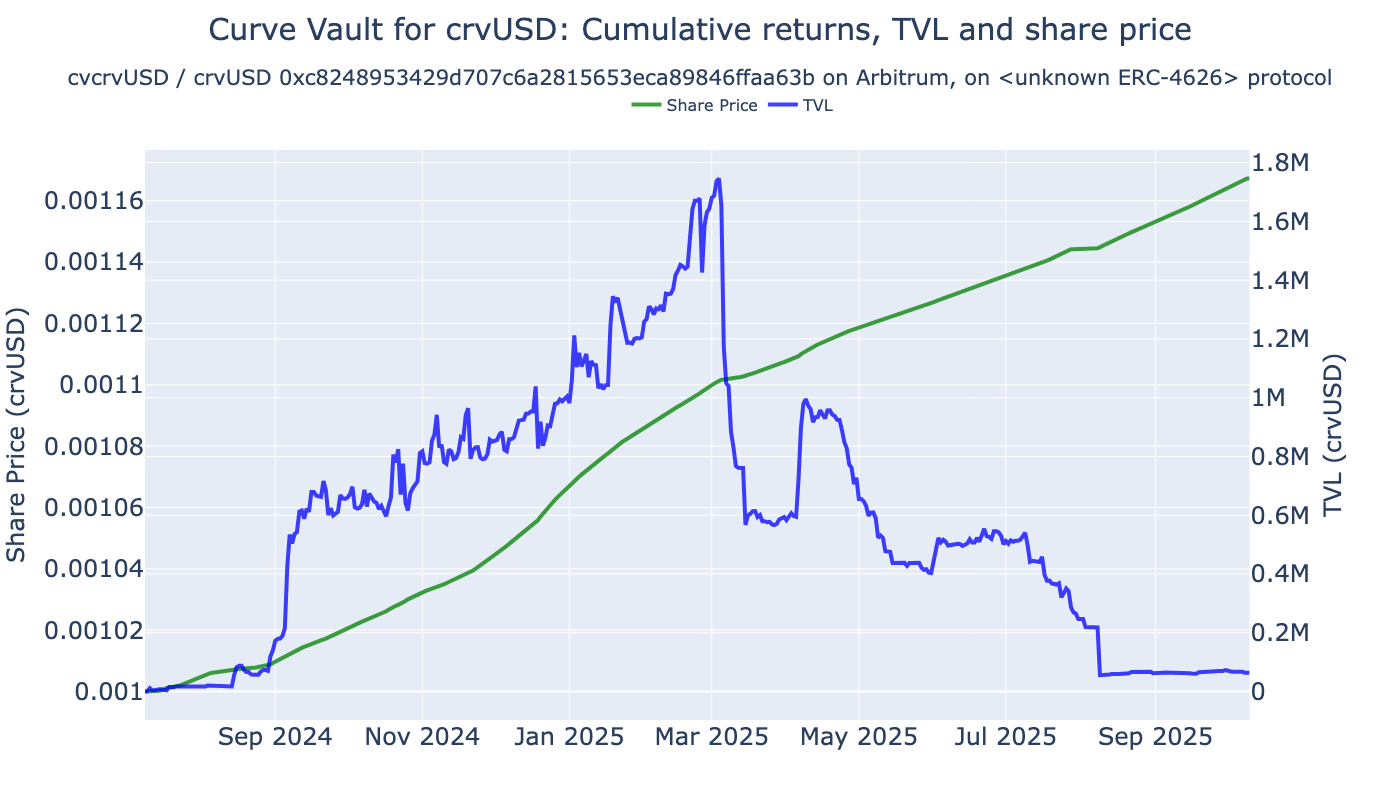

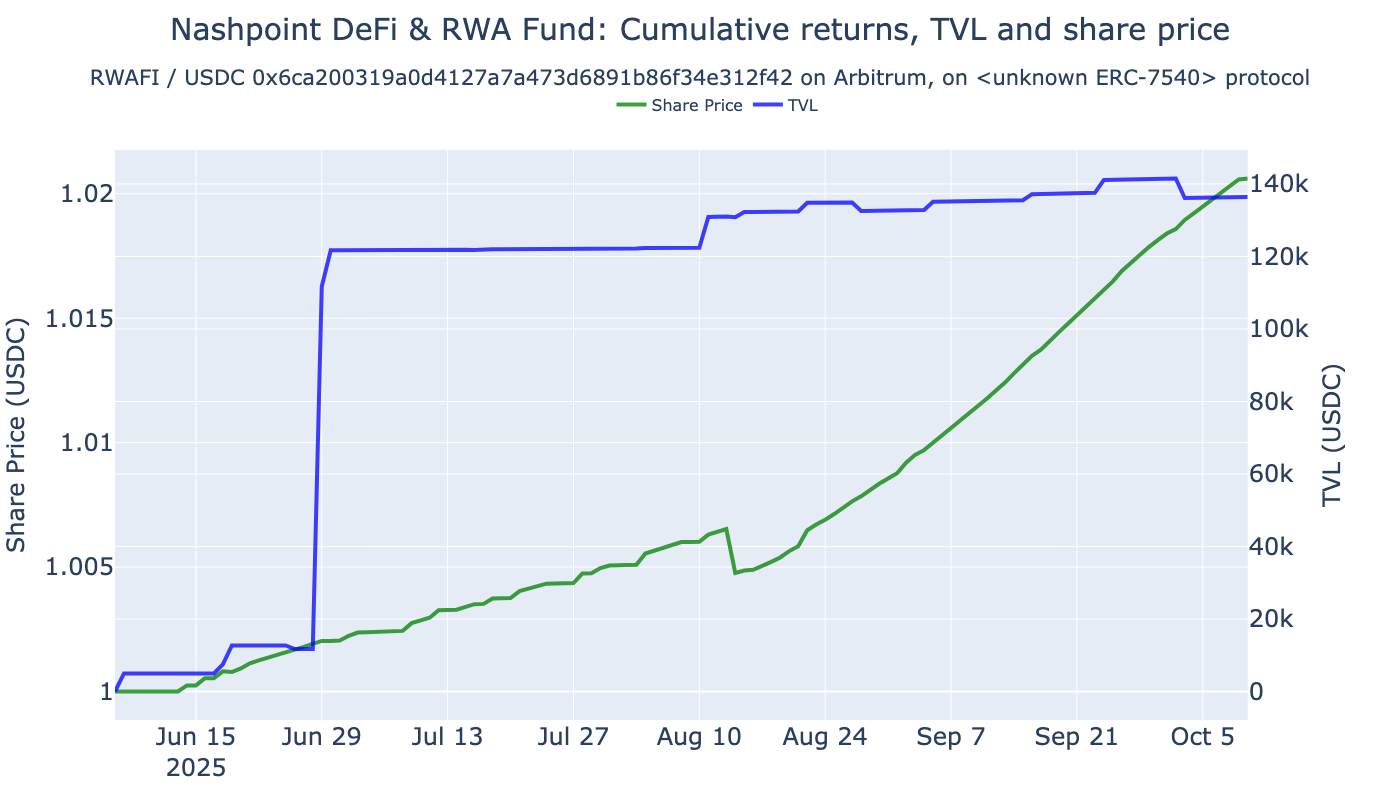

In [64]:
from eth_defi.research.vault_metrics import analyse_vault, format_ffn_performance_stats
from eth_defi.chain import get_chain_name
from eth_defi.research.value_table import format_series_as_multi_column_grid

from tabulate import tabulate
from IPython.display import display, HTML

interest_vault_specs = []

for idx, row in lifetime_data_filtered_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    vault_report = analyse_vault(
        vault_db=vault_db,
        prices_df=prices_df,
        spec=vault_spec,
        chart_frequency="daily",
        logger=lambda x: None,
    )

    chain_name = get_chain_name(vault_spec.chain_id)
    vault_name = vault_report.vault_metadata["Name"]
    display(HTML(f"<h2>Vault {vault_name} ({chain_name}): {vault_spec.vault_address})</h2><br>"))

    # Display returns figur
    returns_chart_fig = vault_report.rolling_returns_chart
    returns_chart_fig.show()

    # Check raw montly share price numbers for each vault
    hourly_price_df = vault_report.hourly_df
    last_price_at = hourly_price_df.index[-1]
    last_price = hourly_price_df["share_price"].asof(last_price_at)
    last_block = hourly_price_df["block_number"].asof(last_price_at)
    month_ago = last_price_at - pd.DateOffset(months=1)
    month_ago_price = hourly_price_df["share_price"].asof(month_ago)
    month_ago_block = hourly_price_df["block_number"].asof(month_ago)

    # Price may be NA if vault is less than month old
    # assert not pd.isna(month_ago_price), f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: no price data for month ago {month_ago} found, last price at {last_price_at} is {last_price}"

    data = {
        "Vault": f"{vault_name} ({chain_name})",
        "Last price at": last_price_at,
        "Last price": last_price,
        "Block last price": f"{month_ago_block:,}",
        "Month ago": month_ago,
        "Block month ago": f"{month_ago_block:,}",
        "Month ago price": month_ago_price,
        "Monthly change %": (last_price - month_ago_price) / month_ago_price * 100,
    }

    df = pd.Series(data)
    # display(df)

    # Display FFN stats
    performance_stats = vault_report.performance_stats
    if performance_stats is not None:
        stats_df = format_ffn_performance_stats(performance_stats)

        multi_column_df = format_series_as_multi_column_grid(stats_df)

        # display(stats_df)
        display(HTML(multi_column_df.to_html(float_format='{:,.2f}'.format, index=True)))
    else:
        print(f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: performance metrics not available, is quantstats library installed?")

## Rolling returns comparison

- Show rolling returns of all picked vaults

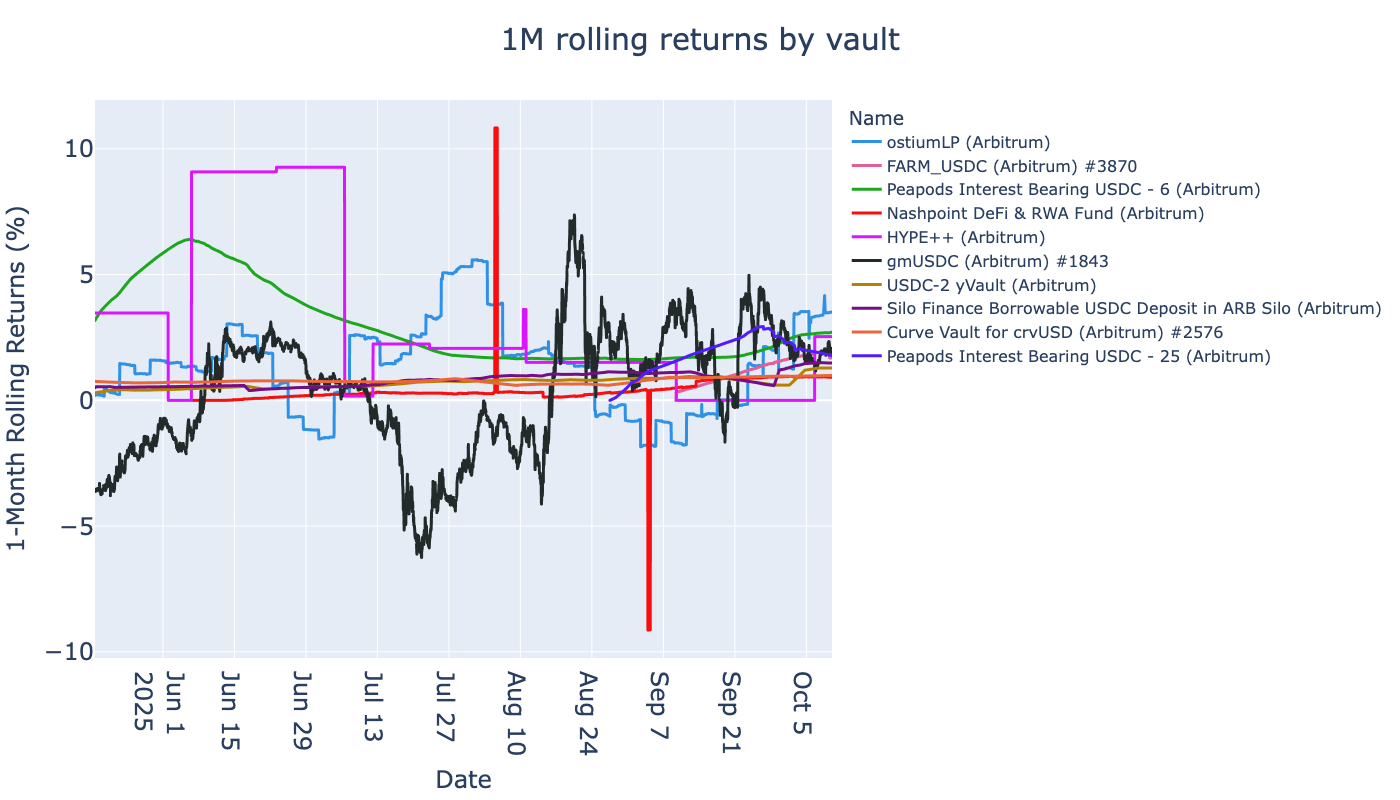

In [65]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()